# 1. Import Library



In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Write Function

In [2]:
def MR_find_W(X, Y):
    Xb = MR_create_Xb(X)
    print("Xb =", Xb)
    print("XbTXb = ",np.dot(Xb.T, Xb) )
    
    front = inv(np.dot(Xb.T, Xb))
    back = np.dot(Xb.T, Y)
    print("Front =",front)
    print("Back =", back)
    
    W = np.dot(front, back)
    return W

In [3]:
def MR_create_Xb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [4]:
def MR_find_Yhat(X, W):
    Xb = MR_create_Xb(X)
    Yhat = np.dot(Xb, W)
    print("Yhat", Yhat)
    return Yhat

In [5]:
def find_error(Y, Yhat, TypeOfError):
    if TypeOfError == 'SSE':
        error = find_SSE(Y, Yhat)
    elif TypeOfError == 'MSE':
        error = find_MSE(Y, Yhat)
    elif TypeOfError == 'MAE':
        error = find_MAE(Y, Yhat)
    elif TypeOfError == 'MAPE':
        error = find_MAPE(Y, Yhat)
    return error

In [6]:
def find_SSE(Y, Yhat):
    SSE = ((Y - Yhat)**2).sum()
    return SSE

In [7]:
def find_MSE(Y, Yhat):
    N = Y.shape[0]
    SSE = ((Y - Yhat)**2).sum()
    MSE = SSE/N
    return MSE

In [8]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [9]:
def find_MAPE(Y, Yhat):
    N = Y.shape[0]
    MAPE = np.abs((Y - Yhat)/Y).sum()*100/N
    return MAPE

# 3. Read Data & Prepare Data

In [10]:
Data = pd.read_csv('multi.csv')

In [11]:
Data

,bathroom,size,price
0,2,4,23
1,3,2,18
2,4,1,17
3,5,7,44
4,6,3,31
5,4,8,22
6,3,7,18
7,4,6,17
8,3,5,18
9,4,8,17


In [12]:
DataMatrix = Data.values
DataMatrix.shape

(10, 3)

In [13]:
X = DataMatrix[:, :2]
Y = DataMatrix[:, 2:]

In [14]:
X_Train = X[:5, :]
Y_Train = Y[:5, :]

In [15]:
X_Test = X[5:, :]
Y_Test = Y[5:, :]

# 4. Create Model

In [16]:
W = MR_find_W(X_Train, Y_Train)
W

Xb = [[1. 2. 4.]
 [1. 3. 2.]
 [1. 4. 1.]
 [1. 5. 7.]
 [1. 6. 3.]]
XbTXb =  [[ 5. 20. 17.]
 [20. 90. 71.]
 [17. 71. 79.]]
Front = [[ 2.03842365 -0.36748768 -0.10837438]
 [-0.36748768  0.1044335  -0.01477833]
 [-0.10837438 -0.01477833  0.04926108]]
Back = [[133.]
 [574.]
 [546.]]


array([[1.],
       [3.],
       [4.]])

In [17]:
Yhat_Train = MR_find_Yhat(X_Train, W)

Yhat [[23.]
 [18.]
 [17.]
 [44.]
 [31.]]


In [18]:
Yhat_Train = MR_find_Yhat(X_Train, W)

Yhat [[23.]
 [18.]
 [17.]
 [44.]
 [31.]]


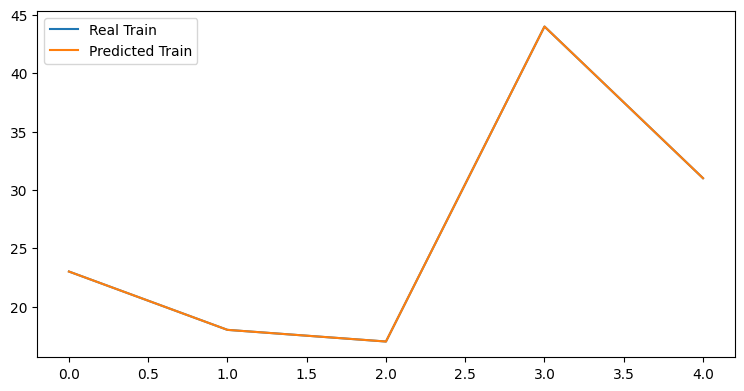

In [19]:
fig = plt.figure(figsize = (9, 4.5))
plt.plot(Y_Train, label = 'Real Train')
plt.plot(Yhat_Train, label = 'Predicted Train')
plt.legend()

# 5. Make Prediction

In [20]:
Yhat_Test = MR_find_Yhat(X_Test, W)

Yhat [[45.]
 [38.]
 [37.]
 [30.]
 [45.]]


In [21]:
error_Test = find_error(Y_Test, Yhat_Test, 'MAPE')
error_Test

np.float64(112.93523469994076)

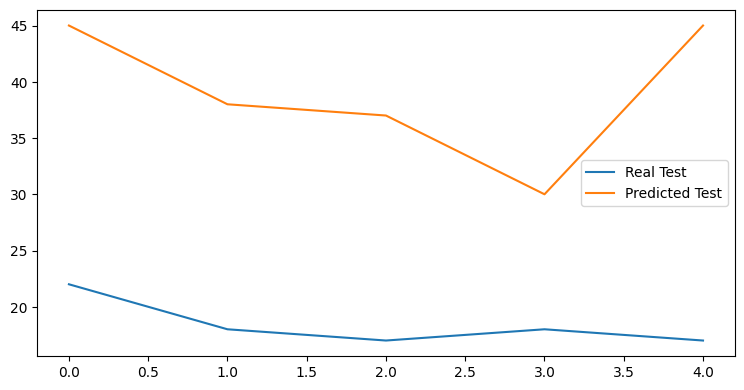

In [22]:
fig = plt.figure(figsize = (9, 4.5))
plt.plot(Y_Test, label = 'Real Test')
plt.plot(Yhat_Test, label = 'Predicted Test')
plt.legend()

### Problem

In [23]:
#try with non invertable data
Data = pd.read_csv('multi2.csv')